<a href="https://colab.research.google.com/github/sammed97/Credit_Card_Default_Prediction/blob/main/Credit_Card_Default_Prediction_Classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/M4/default of credit card clients.csv')

# **EDA - Exporatory Data Analysis**

In [ ]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
df.shape

(30001, 25)

In [ ]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [ ]:
df.rename(columns={'PAY_0':'Sept_repay_status','PAY_2':'Aug_repay_status','PAY_3':'Jul_repay_status','PAY_4':'June_repay_status',
                   'PAY_5':'May_repay_status','PAY_6':'Apr_repay_status',
                   'BILL_AMT1':'Sept_Bill_Amt','BILL_AMT2':'Aug_Bill_Amt','BILL_AMT3':'Jul_Bill_Amt','BILL_AMT4':'Jun_Bill_Amt',
                   'BILL_AMT5':'May_Bill_Amt','BILL_AMT6':'Apr_Bill_Amt','PAY_AMT1':'Sept_Pay_Amt','PAY_AMT2':'Aug_Pay_Amt',
                   'PAY_AMT3':'Jul_Pay_Amt','PAY_AMT4':'Jun_Pay_Amt','PAY_AMT5':'May_Pay_Amt','PAY_AMT6':'Apr_Pay_Amt'}, inplace = True)

In [ ]:
# Seperating Target variable and Features
target = df['default payment next month']
features = df.drop('default payment next month',axis=1,inplace=False)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_repay_status,Aug_repay_status,Jul_repay_status,June_repay_status,May_repay_status,Apr_repay_status,Sept_Bill_Amt,Aug_Bill_Amt,Jul_Bill_Amt,Jun_Bill_Amt,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,Jul_Pay_Amt,Jun_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.rename(columns={'default payment next month':'Default_Payment'},inplace=True)

In [ ]:
df.dtypes

0
ID                   object
LIMIT_BAL            object
SEX                  object
EDUCATION            object
MARRIAGE             object
AGE                  object
Sept_repay_status    object
Aug_repay_status     object
Jul_repay_status     object
June_repay_status    object
May_repay_status     object
Apr_repay_status     object
Sept_Bill_Amt        object
Aug_Bill_Amt         object
Jul_Bill_Amt         object
Jun_Bill_Amt         object
May_Bill_Amt         object
Apr_Bill_Amt         object
Sept_Pay_Amt         object
Aug_Pay_Amt          object
Jul_Pay_Amt          object
Jun_Pay_Amt          object
May_Pay_Amt          object
Apr_Pay_Amt          object
Default_Payment      object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 30000 non-null  object
 1   LIMIT_BAL          30000 non-null  object
 2   SEX                30000 non-null  object
 3   EDUCATION          30000 non-null  object
 4   MARRIAGE           30000 non-null  object
 5   AGE                30000 non-null  object
 6   Sept_repay_status  30000 non-null  object
 7   Aug_repay_status   30000 non-null  object
 8   Jul_repay_status   30000 non-null  object
 9   June_repay_status  30000 non-null  object
 10  May_repay_status   30000 non-null  object
 11  Apr_repay_status   30000 non-null  object
 12  Sept_Bill_Amt      30000 non-null  object
 13  Aug_Bill_Amt       30000 non-null  object
 14  Jul_Bill_Amt       30000 non-null  object
 15  Jun_Bill_Amt       30000 non-null  object
 16  May_Bill_Amt       30000 non-null  objec

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_repay_status,Aug_repay_status,Jul_repay_status,June_repay_status,May_repay_status,Apr_repay_status,Sept_Bill_Amt,Aug_Bill_Amt,Jul_Bill_Amt,Jun_Bill_Amt,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,Jul_Pay_Amt,Jun_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,Default_Payment
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,10,10,22723,22346,22026,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [ ]:
df = df.apply(pd.to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 30000 non-null  int64
 1   LIMIT_BAL          30000 non-null  int64
 2   SEX                30000 non-null  int64
 3   EDUCATION          30000 non-null  int64
 4   MARRIAGE           30000 non-null  int64
 5   AGE                30000 non-null  int64
 6   Sept_repay_status  30000 non-null  int64
 7   Aug_repay_status   30000 non-null  int64
 8   Jul_repay_status   30000 non-null  int64
 9   June_repay_status  30000 non-null  int64
 10  May_repay_status   30000 non-null  int64
 11  Apr_repay_status   30000 non-null  int64
 12  Sept_Bill_Amt      30000 non-null  int64
 13  Aug_Bill_Amt       30000 non-null  int64
 14  Jul_Bill_Amt       30000 non-null  int64
 15  Jun_Bill_Amt       30000 non-null  int64
 16  May_Bill_Amt       30000 non-null  int64
 17  Apr_Bill_Amt

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_repay_status,Aug_repay_status,Jul_repay_status,June_repay_status,May_repay_status,Apr_repay_status,Sept_Bill_Amt,Aug_Bill_Amt,Jul_Bill_Amt,Jun_Bill_Amt,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,Jul_Pay_Amt,Jun_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,Default_Payment
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.isnull().sum()

0
ID                   0
LIMIT_BAL            0
SEX                  0
EDUCATION            0
MARRIAGE             0
AGE                  0
Sept_repay_status    0
Aug_repay_status     0
Jul_repay_status     0
June_repay_status    0
May_repay_status     0
Apr_repay_status     0
Sept_Bill_Amt        0
Aug_Bill_Amt         0
Jul_Bill_Amt         0
Jun_Bill_Amt         0
May_Bill_Amt         0
Apr_Bill_Amt         0
Sept_Pay_Amt         0
Aug_Pay_Amt          0
Jul_Pay_Amt          0
Jun_Pay_Amt          0
May_Pay_Amt          0
Apr_Pay_Amt          0
Default_Payment      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

## **Categorical Variables**

checking for Unique values in all columns

In [ ]:
df['EDUCATION'].unique()

array(['2', '1', '3', '5', '4', '6', '0'], dtype=object)

Here we have total 7 unique features but we have info above of only 4 so we have to merge last 4 categories into 1

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

we will merge 0,5,6 into 4

In [ ]:
df['EDUCATION'].replace([0,5,6],4,inplace=True)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Gender Column

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Here,
 
1: MALE

2: FEMALE

Marital Status

In [ ]:
df['MARRIAGE'].unique()
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

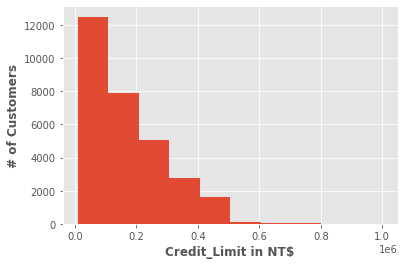

In [ ]:
plt.hist(df["LIMIT_BAL"])
plt.xlabel('Credit_Limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

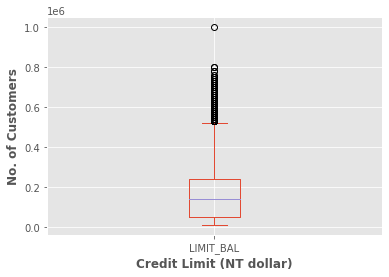

In [43]:
df['LIMIT_BAL'].plot(kind='box')
plt.xlabel('Credit Limit (NT dollar)',fontweight='bold')
plt.ylabel('No. of Customers',fontweight='bold')
plt.show()

In [47]:
df.set_index('ID',inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_repay_status,Aug_repay_status,Jul_repay_status,June_repay_status,May_repay_status,Apr_repay_status,Sept_Bill_Amt,Aug_Bill_Amt,Jul_Bill_Amt,Jun_Bill_Amt,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,Jul_Pay_Amt,Jun_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,Default_Payment
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

In [ ]:
a=df['Default_Payment'].value_counts()
y= a[1]
n = len(df.Default_Payment)-y
print("No of Default Payments",y)
print("No of Regular Payments",n)
default_perc = round((y/len(df.Default_Payment)*100),1)
non_defaulted = round((n/len(df.Default_Payment)*100),1)
print("Percentage of Default Payment is",default_perc,"%")
print("Percentage of Regular Payment is",non_defaulted,"%")

No of Default Payments 6636
No of Regular Payments 23364
Percentage of Default Payment is 22.1 %
Percentage of Regular Payment is 77.9 %


Text(0.5, 1.0, 'Credit Card Count')

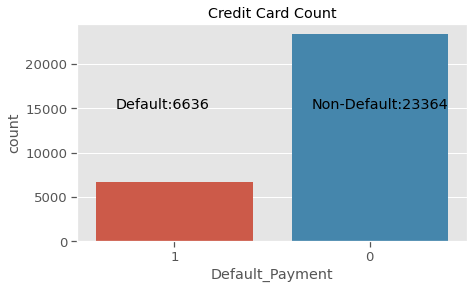

In [ ]:
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default_Payment',data=df)
plt.annotate('Non-Default:{}'.format(n),xy=(0.7, 15000))
plt.annotate('Default:{}'.format(y),xy=(-0.3, 15000))
plt.title('Credit Card Count')


In [48]:
def_condition = (df.Sept_repay_status >1) | (df.Aug_repay_status >1) | (df.Jul_repay_status >1) | (df.June_repay_status >1) | (df.May_repay_status >1) | (df.Apr_repay_status >1)
df.loc[def_condition, "HAS_DEF"] = 1
df.loc[df.HAS_DEF.isna(), "HAS_DEF"] = 0

In [49]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sept_repay_status,Aug_repay_status,Jul_repay_status,June_repay_status,May_repay_status,Apr_repay_status,Sept_Bill_Amt,Aug_Bill_Amt,Jul_Bill_Amt,Jun_Bill_Amt,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,Jul_Pay_Amt,Jun_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,Default_Payment,HAS_DEF
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1.0
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1.0
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.0


In [50]:
df['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

In [51]:
df['HAS_DEF'].value_counts

0.0    21620
1.0     8380
Name: HAS_DEF, dtype: int64